In [2]:
import numpy as np
# Paket zum erstellen von Schaubildern
import matplotlib
import matplotlib.pyplot as plt
# Paket fuer statistische Methoden und Zufallsverteilungen
from scipy import stats

[[ 9  8 11  6 19]
 [ 7 16  1 13  3]
 [15  2  5 14 20]
 [16 18 20 19  7]
 [14  5 13  2 11]
 [19  3 13 14 10]
 [12  4 19 16  8]
 [16  2  4 19 17]
 [18  1 11  2 14]
 [17 17  8  3  6]
 [15 17  8  7 20]
 [20  6 10 16  1]
 [ 7 17 15  3 12]
 [19 18 15 15  1]
 [ 3 12 18 10  5]
 [19  6 13  9  4]
 [20  1  8 16  3]
 [17 19  1 14 11]
 [ 1  6 15 17 12]
 [ 6 15  7 16  5]]
[ 9  8 11  6 19  7 16  1 13  3 15  2  5 14 20 16 18 20 19  7 14  5 13  2 11
 19  3 13 14 10 12  4 19 16  8 16  2  4 19 17 18  1 11  2 14 17 17  8  3  6
 15 17  8  7 20 20  6 10 16  1  7 17 15  3 12 19 18 15 15  1  3 12 18 10  5
 19  6 13  9  4 20  1  8 16  3 17 19  1 14 11  1  6 15 17 12  6 15  7 16  5]
[ 10.6   8.   11.2  16.    9.   11.8  11.8  11.6   9.2  10.2  13.4  10.6
  10.8  13.6   9.6  10.2   9.6  12.4  10.2   9.8]
(10.98, 1.8032193432857804)


/home/karimel/.local/lib/python2.7/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


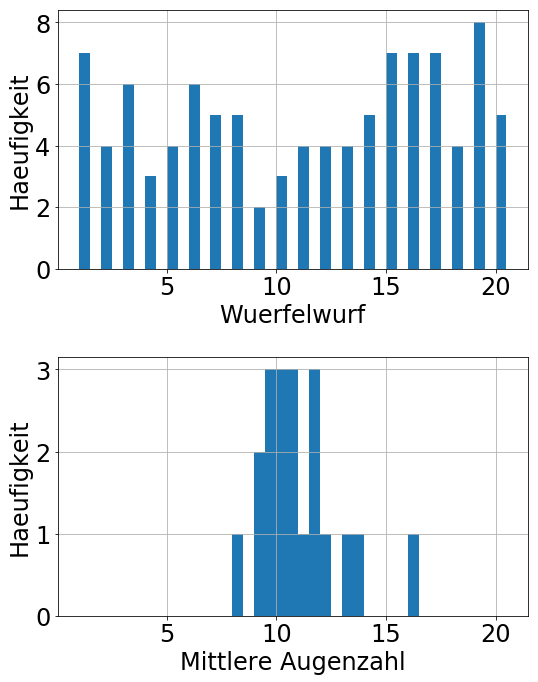

In [3]:

# Setze Optionen fuer den Stil der matplotlib Grafiken
matplotlib.rcParams['figure.autolayout'] = True
matplotlib.rcParams['font.size'] = 24

#Anzahl der Wuerfelrunden
n_sets = 20

#Anzahl der Wuerfe pro Runde
n_wuerfe = 5

# Seiten des ''Wuerfels''
n_seiten = 20

# Ziehe n_sets x n_wuerfe gleichverteilte Zufallszahlen zwischen 1 und 6
zufallszahlen = np.random.randint( low=1, high=n_seiten+1 , size = ( n_sets, n_wuerfe ) )

# Gebe Ergebnis auf dem Terminal aus
print( zufallszahlen )
# Das Objekt zufallszahlen ist ein 2D array bestehend aus den Wuerfen pro Runde
#print(type(zufallszahlen))
#print(len(zufallszahlen))

# Erstelle 1D array aller Wuerfe
alle_wuerfe=zufallszahlen.flatten()
print(alle_wuerfe)
#print(len(alle_wuerfe))

# Mittelwert der Augenzahlen fuer jede Runde
# Erstelle 1D array mit den Mittelwerten der einzelnen Runden
mittelwerte = zufallszahlen.mean( axis = 1 )
print( mittelwerte )

#Erstellen der Schaubilder
#Erstelle eine Leinwand mit 2 Schaubildern
fig,axes = plt.subplots(2)
# fig = Figure Objekt
# Setze groesse in Zoll (breite, hoehe)
fig.set_size_inches(8,10)
# axes = Axen der beiden Schaubilder
axis_means=axes[1]
axis_wuerfe=axes[0]


#Histogrammiere Ergebnisse
schritt = 0.5
schritt_means=0.5
bingrenzen_wuerfe = np.arange( 1, n_seiten+1, schritt )
bingrenzen_means = np.arange( 1, (n_seiten+1), schritt_means )
axis_wuerfe.hist( alle_wuerfe, bins=bingrenzen_wuerfe )
axis_means.hist( mittelwerte, bins=bingrenzen_means )

## Schaubild aller Wuerfe
# Grafik plotten
axis_wuerfe.plot()

# Verschoenerung der Darstellung
axis_wuerfe.set_xlabel( r'Wuerfelwurf' )
axis_wuerfe.set_ylabel( r'Haeufigkeit' )
axis_wuerfe.grid( True )


## Schaubild der Mittelwerte
# Anpassung einer Gaussverteilung an die Verteilung der Mittelwerte
fitmittel, standardabweichung = stats.norm.fit( mittelwerte )
print( fitmittel, standardabweichung )
x = np.linspace( 1, n_seiten, 100 )
y = n_sets * schritt_means * stats.norm.pdf( x, fitmittel, standardabweichung )
#axis_means.plot( x, y )

#Verschoenerung der Darstellung
axis_means.set_xlabel( r'Mittlere Augenzahl' )
axis_means.set_ylabel( r'Haeufigkeit' )
axis_means.grid( True )